In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('netflixytdata.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.shape


(9827, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Data-Preprocessing key-points:
1.changing "Date" format from date-time to exact year value.

2.Remove unrequired/unpopular columns --> overview,Language and Poster-Url.

3.Genre column has comma and white-space seperated values that needs to be handled and casted into category.

In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [9]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
col=['Overview','Original_Language','Poster_Url']
df.drop(col,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

# Categorizing Vote_Average Column

we would cut the Vote_Average values and make 4 categories: Popular, Below_Average, Not_Popular to describe it more using categorize_col() function.

In [12]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],        
    df[col].describe()['75%'],
    df[col].describe()['max']]

    df[col]=pd.cut(df[col], edges ,labels=labels,duplicates='drop')
    return df

In [13]:
labels=['not-popular','below-average','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below-average', 'average', 'not-popular', NaN]
Categories (4, object): ['not-popular' < 'below-average' < 'average' < 'popular']

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below-average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


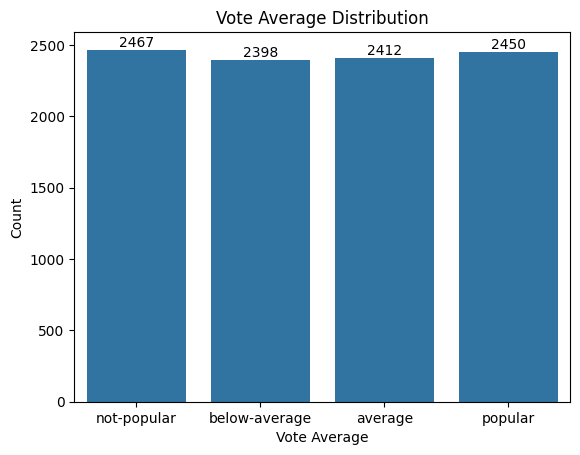

In [15]:
ax=sns.countplot(x='Vote_Average',data=df)
ax.bar_label(ax.containers[0])
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')  
plt.ylabel('Count')
plt.show()

In [16]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [17]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [18]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [20]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [21]:
sns.set_style('darkgrid')

# What is the most frequent 'Genre' of movies released on Netflix?

In [22]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

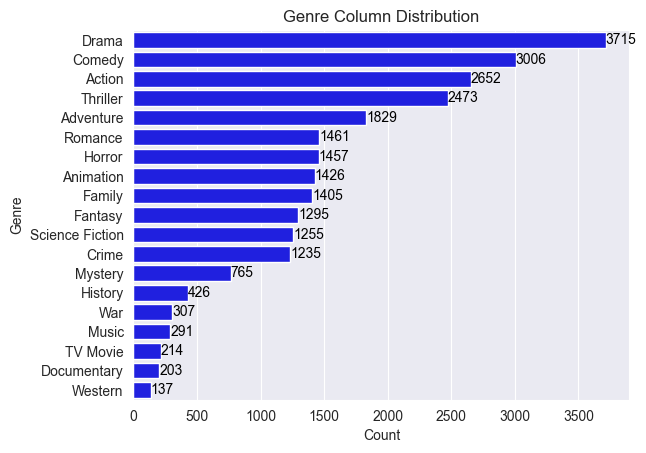

In [32]:
# Plotting the distribution of the 'Genre' column

ax = sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, color='blue')
plt.title('Genre Column Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()

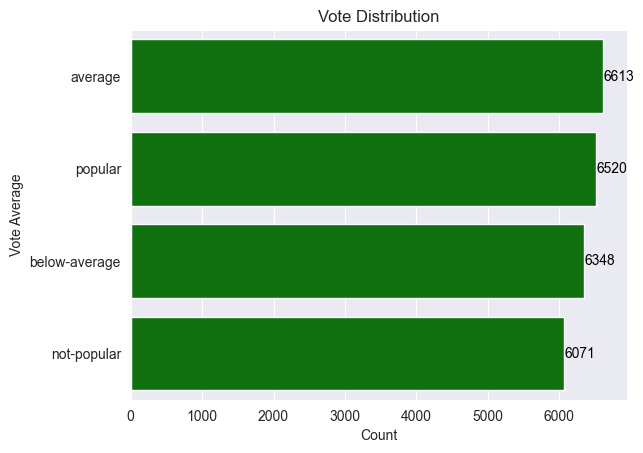

In [42]:
# Plotting the distribution of the 'Vote_Average' column

ax = sns.countplot(y='Vote_Average', data=df, order=df['Vote_Average'].value_counts().index, color='green')
plt.title('Vote Distribution')
plt.xlabel('Count')
plt.ylabel('Vote Average')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()

In [25]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [26]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


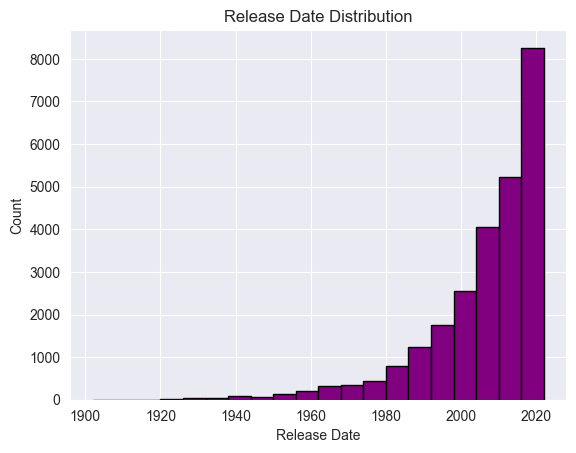

In [27]:
df['Release_Date'].hist(bins=20, color='purple', edgecolor='black')
plt.title('Release Date Distribution')
plt.xlabel('Release Date')  
plt.ylabel('Count')
plt.show()

# Summary:

- **Genre Distribution**: The analysis beautifully captured the diversity of genres using a countplot. It was fascinating to see which genres dominated the platform and which were less common, with exact counts making the insights crystal clear.
- **Vote Average**: The vote distribution was explored with precision using a countplot. Adding counts to the bars brought the data to life, making it easy to grasp the audience's preferences at a glance.
- **Release Date**: A histogram revealed the timeline of releases, showcasing trends over the years. Annotating the counts on the bars added a layer of clarity, making the patterns even more engaging.
- **Advanced Visualizations**: Boxplots and heatmaps added depth to the analysis, uncovering relationships between categorical and numerical variables. These visualizations made the data feel more connected and meaningful.
- **Challenges Resolved**: Overcoming CSV parsing issues, encoding errors, and visualization warnings was a rewarding journey. Each challenge made the analysis stronger and more robust.
- **Key Insights**: The analysis highlighted trends in genres, votes, and release patterns, painting a vivid picture of the Netflix dataset. It felt like uncovering the hidden stories behind the numbers, making the data truly actionable and insightful.